In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv")

In [3]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
data.drop(data.columns[[0,1,4]], axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [10]:
enc= LabelEncoder()
si= SimpleImputer()

In [12]:
columns=['Sex','Cabin','Ticket','Embarked']
data[columns] = data[columns].apply(enc.fit_transform)

In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,523,7.2500,147,2
1,1,1,0,38.0,1,0,596,71.2833,81,0
2,1,3,0,26.0,0,0,669,7.9250,147,2
3,1,1,0,35.0,1,0,49,53.1000,55,2
4,0,3,1,35.0,0,0,472,8.0500,147,2


In [14]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [15]:
data['Age']=si.fit_transform(data[['Age']])

In [17]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In [47]:
Age_2=np.where(data['Age']<=1,data['Age'].mean(), data['Age'])
Age_2

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [48]:
data['Age']=Age_2

In [22]:
data['Ticket']=data['Ticket'].replace(0,data['Ticket'].mean())

In [25]:
data['Fare']=data['Fare'].replace(0,data['Fare'].mean())
data['Cabin']=data['Cabin'].replace(0,data['Cabin'].mean())


In [26]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,339.668447,32.746366,130.890846,1.828850
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,199.883437,49.514272,35.756361,0.315600
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,1.000000,4.012500,1.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,161.500000,7.925000,147.000000,1.538721
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,15.100000,147.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,32.204208,147.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


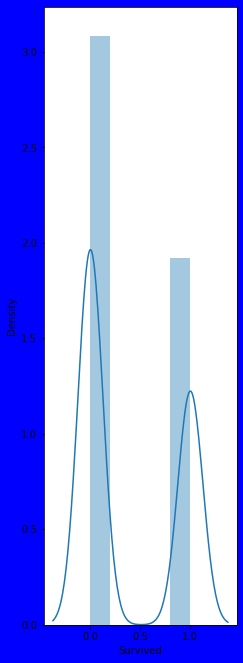

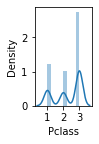

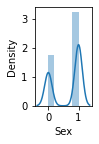

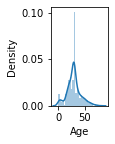

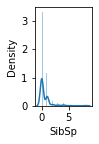

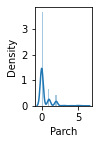

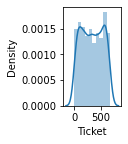

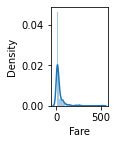

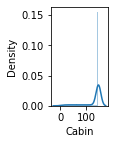

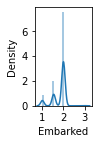

In [28]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber=1
for column in data:
 if plotnumber<=10:
    ax=plt.subplot(2,5,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column)
 plotnumber=plotnumber+1
 plt.show()

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

In [30]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [32]:
bf= SelectKBest(score_func=f_classif,k=9)
fit=bf.fit(x,y)
scores=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)

In [33]:
Total_Score=pd.concat([columns,scores],axis=1)
Total_Score

,0,0
0,Pclass,115.031272
1,Sex,372.405724
2,Age,4.353516
3,SibSp,1.110572
4,Parch,5.963464
5,Ticket,22.795604
6,Fare,59.820648
7,Cabin,64.473812
8,Embarked,7.336921


KeyError: 'Survived'

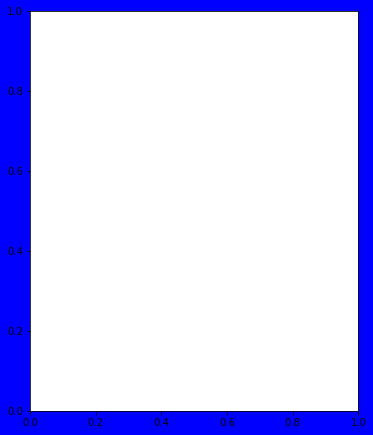

In [50]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber=1
for column in data.columns:
 if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    plt.scatter(y,x[column])
    plt.xlabel(column)
    plt.ylabel('Survived')
 plotnumber=plotnumber+1
 plt.show()

In [38]:
Scalar=StandardScaler()
X_Scaled=Scalar.fit_transform(x)

In [40]:
X_Scaled.shape[1]

9

In [41]:
x_train,y_train,x_test,y_test=train_test_split(X_Scaled,y,test_size=0.25,)

In [42]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

ValueError: y should be a 1d array, got an array of shape (223, 9) instead.

In [49]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')